<div style="text-align: center;">
    <img src="imagen/Brands.jpg" alt="Several Card Brands" width="250"/>
</div>

# CarPrice Project
- Phase 1: Discovery.
- Phase 2: Data Preparation.
- Phase 3: Model Planning.
- Phase 4: Model Building.
- Phase 5: Communicate Results

Type of 
1. Clustering
2. Association rules
3. Regression
4. Classification (Naïve Bayes)


## Deliveries
* The original data (a link to download it from the source)
* Modified data files
* Code 
* PowerPoint file
* Instruction file to perform the analysis

## Discovery
**********
- The dataset has information of 205 types of cars from different makes and types.
- The prices seems to be for used cards, however no information of the year of production or year of price setting.  As some models are not available in the market the dataset seems to be outdated.
- The dataset is complete and suitable for the test requeired in the project.
- Prediction of the prices seems to be a good reaserching goal. 

## Data Preparation.
**************************

In [1]:
# Importing libraries for data handling
import pandas as pd
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# To load the CSV file 
cardata = pd.read_csv('CarPrice.csv')  

## Exploring the File 
-------------
### General  Observations
1.  Shape  205 rows,  26 variables 
2.  Variables: 10 categorical, 16 numeric, 
3.  No null values. No duplicated rows
4.  CarName has embeded the Car Make and not information about the Country of Origen. 
5.  Price as target variable.
      * Mean:  13,276.7
      * Max 45,800.   Mim 5,118.  Std: 7,988
----------------------------


In [2]:
#Check 5 lines if the data. 
cardata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Check the data
cardata.shape

(205, 26)

In [4]:
# Info and Describe 
cardata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cardata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
cardata.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
cardata.duplicated().sum()

0

In [8]:
# Sort columns by data type
sorted_dtypes = cardata.dtypes.sort_values()

# Display the sorted data types
print(sorted_dtypes)

car_ID                int64
symboling             int64
citympg               int64
peakrpm               int64
horsepower            int64
enginesize            int64
curbweight            int64
highwaympg            int64
compressionratio    float64
stroke              float64
boreratio           float64
carheight           float64
carlength           float64
wheelbase           float64
carwidth            float64
price               float64
enginetype           object
cylindernumber       object
enginelocation       object
fuelsystem           object
drivewheel           object
carbody              object
doornumber           object
aspiration           object
fueltype             object
CarName              object
dtype: object


In [9]:
# Separate variables by type
numeric_vars = cardata.select_dtypes(include=['number'])  # Numeric variables
categorical_vars = cardata.select_dtypes(include=['object'])  # Categorical variables

# Sum the numeric variables
sum_numeric = numeric_vars.sum()
# Count unique values for categorical variables
unique_categorical = categorical_vars.nunique()

# Count the number of columns in numeric and categorical variables
num_numeric_columns = numeric_vars.shape[1]  # Number of numeric columns
num_categorical_columns = categorical_vars.shape[1]  # Number of categorical columns

# Results
print("Sum of numeric variables:")
print(f"Number of numeric columns: {num_numeric_columns}")

print("\nUnique values in categorical variables:")
print(unique_categorical)
print(f"Number of categorical columns: {num_categorical_columns}")

Sum of numeric variables:
Number of numeric columns: 16

Unique values in categorical variables:
CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64
Number of categorical columns: 10


# Data Preparation

In [10]:
# Describe Categories on Ceterical Variables. 

for col in categorical_vars:
    
    print(f"Category in {col} is : {cardata[col].unique()}")

Category in CarName is : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick sk

In [11]:
# Display the columns names
categorical_vars.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

## Data Preparation for KNN


3.1. Model 1: Clustering
1.	Objective: Group cars based on similar attributes to identify distinct segments.
2.	Features for Clustering:
#### Select relevant features: , Engine_Size, Year, Price.
#### Normalize the features to ensure equal weight in clustering.
4.	Clustering Algorithm:
o	Use K-Means Clustering:
#### Determine the optimal number of clusters (k) using the Elbow Method.
#### Alternative: DBSCAN for density-based clustering.
5.	Output:
#### Visualize clusters with a scatter plot (e.g., Mileage vs. Price).
#### Analyze cluster characteristics (e.g., economy cars vs. luxury cars).
6.	Insights:
#### How do the clusters align with pricing and features?
#### What actionable insights can dealerships derive from these segments?

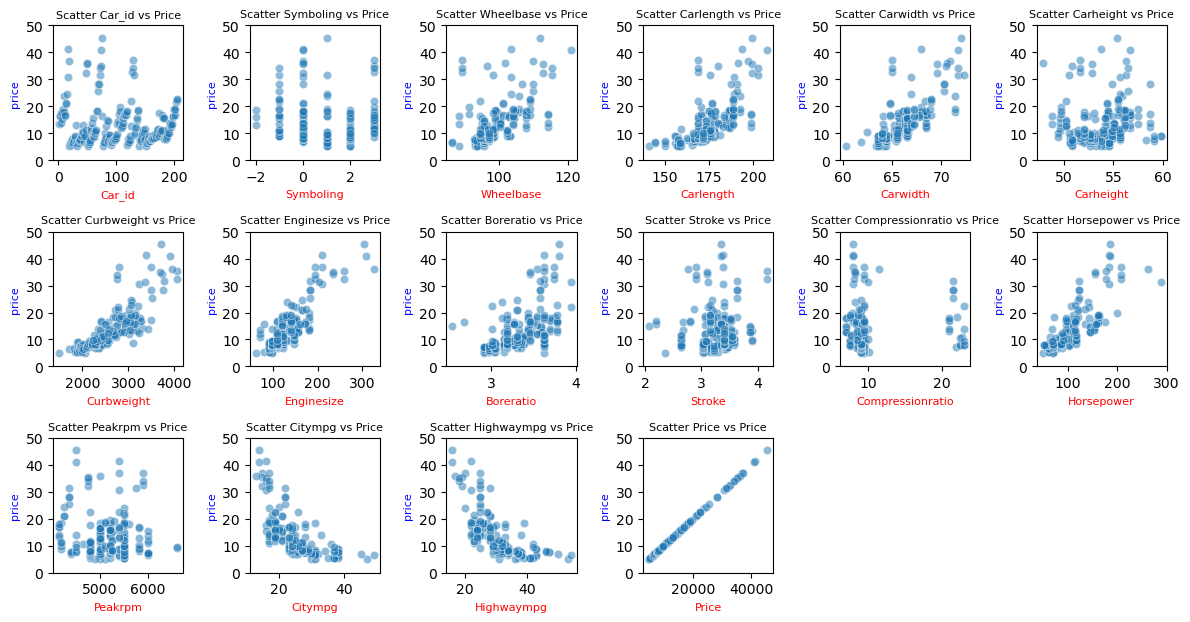

In [12]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_vars):
    plt.subplot(4, 6, i + 1)
    sns.scatterplot(x=feature, y='price', data=cardata, alpha=0.5)
    plt.title(f'Scatter {feature.capitalize()} vs Price',  fontsize=8 )
    plt.yticks(range(0, 50001, 10000), [str(x // 1000) for x in range(0, 50001, 10000)])
    plt.xlabel(feature.capitalize(), fontsize=8, color='red')
    plt.ylabel('price', fontsize=8, color='blue')
plt.tight_layout()
plt.show()

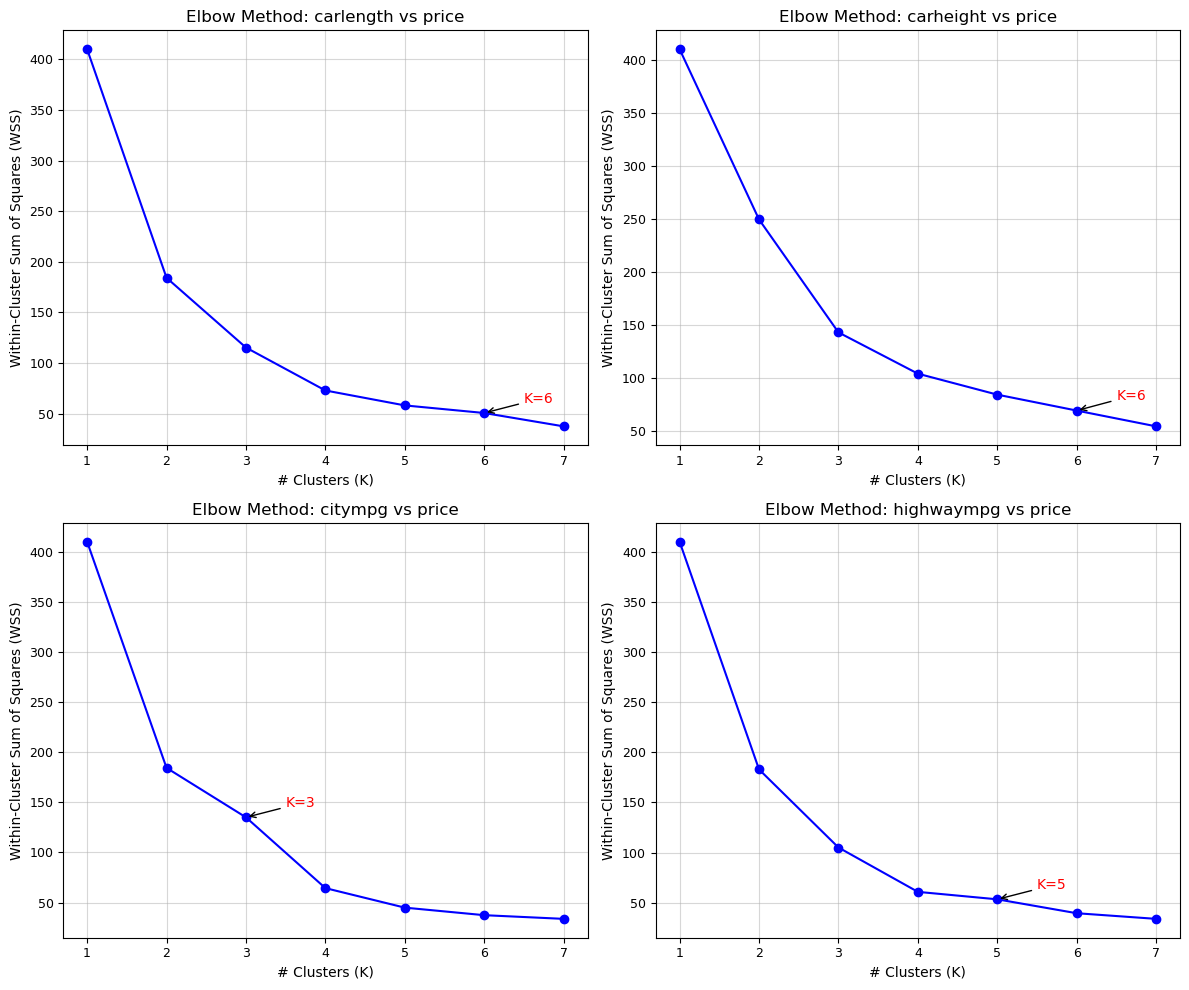

In [13]:
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

warnings.filterwarnings("ignore", category=UserWarning)

# Ajustar número de hilos en Windows para evitar advertencias de memoria
os.environ['OMP_NUM_THREADS'] = '1'

# Variables de interés
variables = ['carlength', 'carheight', 'citympg', 'highwaympg']
target = 'price'

# Configurar figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Aplanar para iterar fácilmente

for i, var in enumerate(variables):
    # Filtrar las columnas de interés
    data_filtered = cardata[[var, target]]

    # Escalar los datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_filtered)

    # Calcular WSS
    wss = []
    k_range = range(1, 8)  # Valores de K

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        wss.append(kmeans.inertia_)

    # Determinar el punto del "codo"
    differences = np.diff(wss)
    second_diff = np.diff(differences)  # Segunda derivada
    k_optimal = k_range[np.argmin(second_diff) + 1]  # Índice ajustado

    # Gráfico de WSS para la variable actual
    axes[i].plot(k_range, wss, marker='o', linestyle='-', color='b')
    axes[i].set_title(f'Elbow Method: {var} vs {target}', fontsize=12)
    axes[i].set_xlabel('# Clusters (K)', fontsize=10)
    axes[i].set_ylabel('Within-Cluster Sum of Squares (WSS)', fontsize=10)
    axes[i].grid(alpha=0.5)
    axes[i].tick_params(axis='both', labelsize=9)

    # Anotar el valor óptimo de K
    axes[i].annotate(f'K={k_optimal}', 
                     xy=(k_optimal, wss[k_optimal-1]), 
                     xytext=(k_optimal+0.5, wss[k_optimal-1] + 10),
                     arrowprops=dict(facecolor='red', arrowstyle='->'),
                     fontsize=10, color='red')

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()

In [14]:
#Features
features = ['enginesize', 'price', 'carbody', 'enginetype']
data = cardata[features]

# Split numeric and categorical variables.
categorical_features = ['carbody', 'enginetype']
numeric_features = ['enginesize', 'price']

# Create a ColumnTransformer to normalize and encode
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Normalize numeric variables
        ('cat', OneHotEncoder(), categorical_features)  # Encode Categorical Variables. 
    ]
)

# Fit Transfrom
data_preprocessed = preprocessor.fit_transform(data)

# Convertir a DataFrame para mejor legibilidad (opcional)
data_preprocessed_df = pd.DataFrame(data_preprocessed.toarray() if hasattr(data_preprocessed, 'toarray') else data_preprocessed)

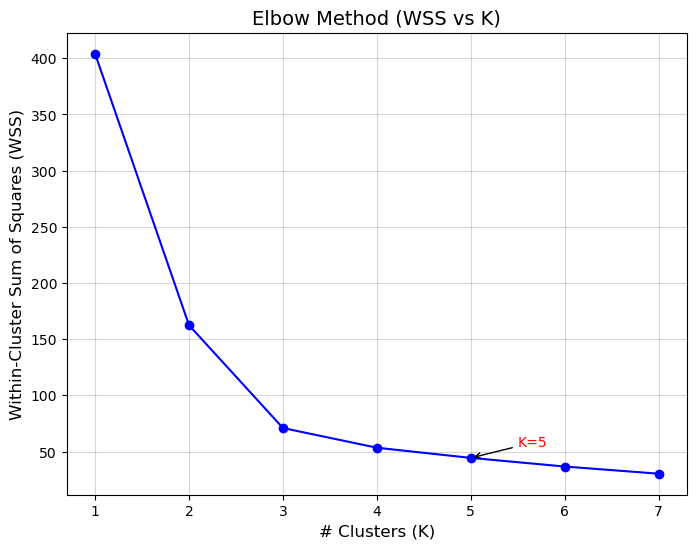

In [15]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
warnings.filterwarnings("ignore", category=UserWarning)

# Filtrar los datos para incluir solo motores con tamaño <= 300
data_filtered = cardata[cardata['enginesize'] <= 300][['enginesize', 'price']]

# Escalar los datos si es necesario (opcional, según los rangos de tus variables)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# Calcular WSS para diferentes valores de K
wss = []
k_range = range(1, 8)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wss.append(kmeans.inertia_)  # La inercia mide el WSS

# Generar el gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, wss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method (WSS vs K)', fontsize=14)
plt.xlabel('# Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WSS)', fontsize=12)
plt.xticks(k_range)

plt.annotate(f'K={k_optimal}', 
             xy=(k_optimal, wss[k_optimal-1]), 
             xytext=(k_optimal+0.5, wss[k_optimal-1] + 10),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10, color='red')

plt.grid(alpha=0.5)
plt.show()


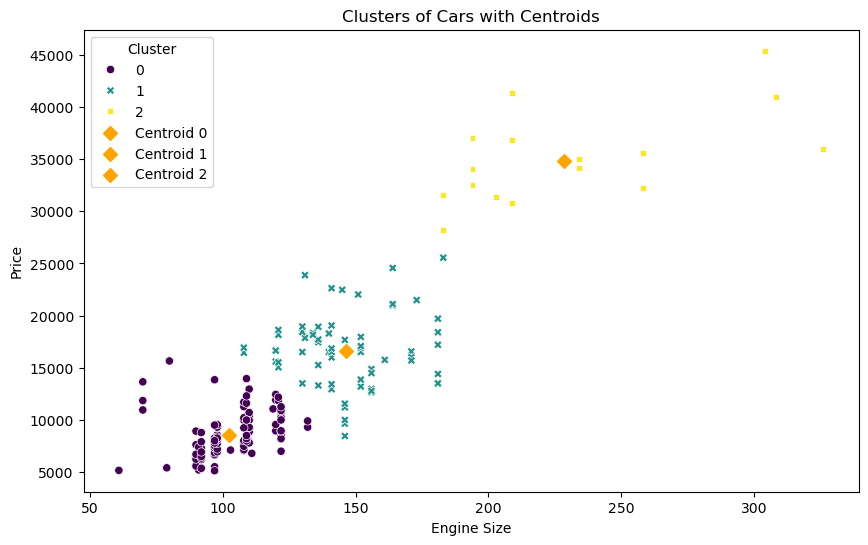

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features
features = ['enginesize', 'price']
data = cardata[features]

# Normalize the features
scaler = StandardScaler()
data_preprocessed = scaler.fit_transform(data)

# K-Means clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Add the cluster labels to the original DataFrame
cardata['Cluster'] = kmeans.fit_predict(data_preprocessed)

# Visualization
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='enginesize', y='price', hue='Cluster',
    data=cardata,
    palette='viridis',
    style='Cluster'
)

# Add centroids to the plot
centroids = kmeans.cluster_centers_  # Get the centroids

# Inverse transform the centroids to the original scale
centroids_original = scaler.inverse_transform(centroids)

# Plot centroids
for idx, centroid in enumerate(centroids_original):
    plt.scatter(
        centroid[0], centroid[1],
        s=50, c='orange', marker='D', label=f'Centroid {idx}'
    )

plt.title('Clusters of Cars with Centroids')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()


### Kmeans with 4 centroids

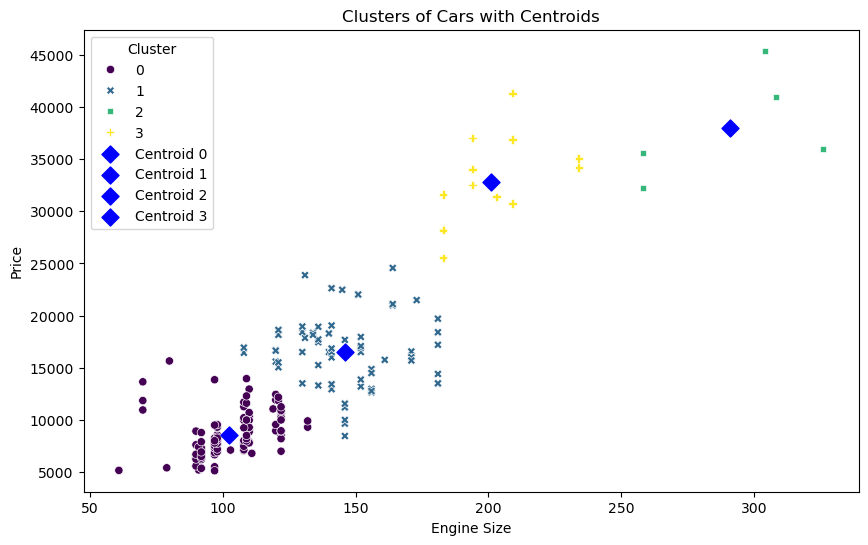

In [17]:
# Select relevant features
features = ['enginesize', 'price']
data = cardata[features]

# Normalize the features
scaler = StandardScaler()
data_preprocessed = scaler.fit_transform(data)

# K-Means clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Add the cluster labels to the original DataFrame
cardata['Cluster'] = kmeans.fit_predict(data_preprocessed)

# Visualization
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='enginesize', y='price', hue='Cluster',
    data=cardata,
    palette='viridis',
    style='Cluster'
)

# Add centroids to the plot
centroids = kmeans.cluster_centers_  # Get the centroids

# Inverse transform the centroids to the original scale
centroids_original = scaler.inverse_transform(centroids)

# Plot centroids
for idx, centroid in enumerate(centroids_original):
    plt.scatter(
        centroid[0], centroid[1],
        s=75, c='blue', marker='D', label=f'Centroid {idx}'
    )

plt.title('Clusters of Cars with Centroids')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')

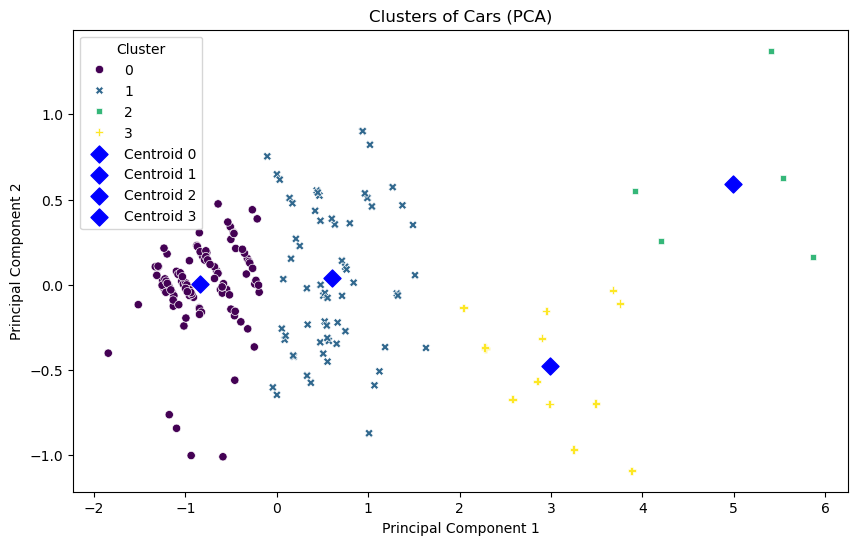

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_preprocessed)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_pca[:, 0], y=data_pca[:, 1], hue='Cluster',
    data=cardata, palette='viridis', style='Cluster'
)

# Agregar centroides de PCA
centroids_pca = pca.transform(centroids)
for idx, centroid in enumerate(centroids_pca):
    plt.scatter(
        centroid[0], centroid[1], s=75, c='blue', marker='D', label=f'Centroid {idx}'
    )

plt.title('Clusters of Cars (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

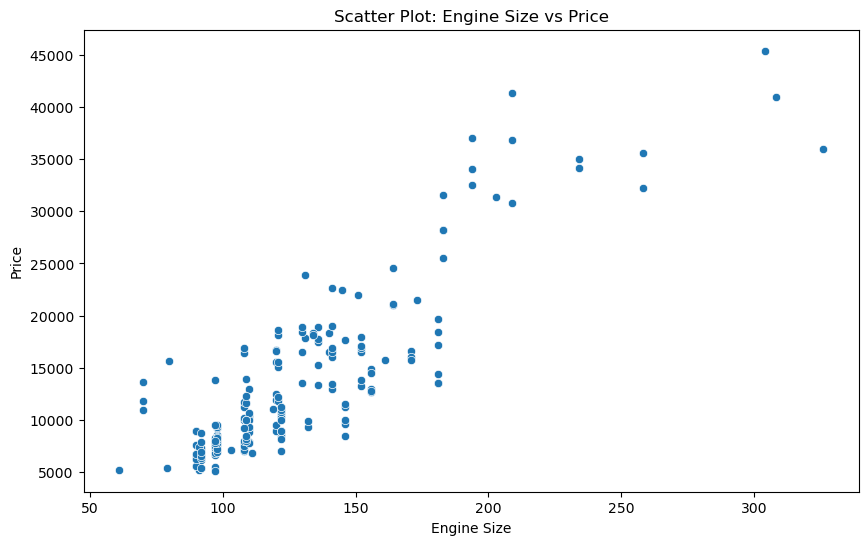

In [20]:
# Crear un gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='enginesize', y='price', data=cardata, palette='plasma')

# Títulos y etiquetas
plt.title('Scatter Plot: Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

# Mostrar el gráfico
plt.show()

# Regression
*******

### 3.2. Model 2: Regression
#### 1.	Objective: Predict car prices based on features.
#### 2.	Features for Regression:
### Use features such as , , enginesize, fuelype, and asspiration.
#### 3.	Regression Algorithms:
- Linear Regression as a baseline model.
- Random Forest Regressor or Gradient Boosting (e.g., XGBoost) for non-linear relationships.
#### 4.	Train-Test Split:
### Split the dataset into training and testing sets (e.g., 80-20 split).
#### 5.	Evaluation:
- Metrics: Use R², Mean Absolute Error (MAE), and Mean Squared Error (MSE).
- Cross-validate to ensure robustness.
##### 6. Feature Importance:
- Identify which features have the greatest impact on car prices.
- Nu
car_ID                int64
symboling             int64
citympg               int64
peakrpm               int64
horsepower            int64
enginesize            int64
curbweight            int64
highwaympg            int64
compressionratio    float64
stroke              float64
boreratio           float64
carheight           float64
carlength           float64
wheelbase           float64
carwidth            float64
price               float64


In [21]:
print(numeric_vars.columns)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


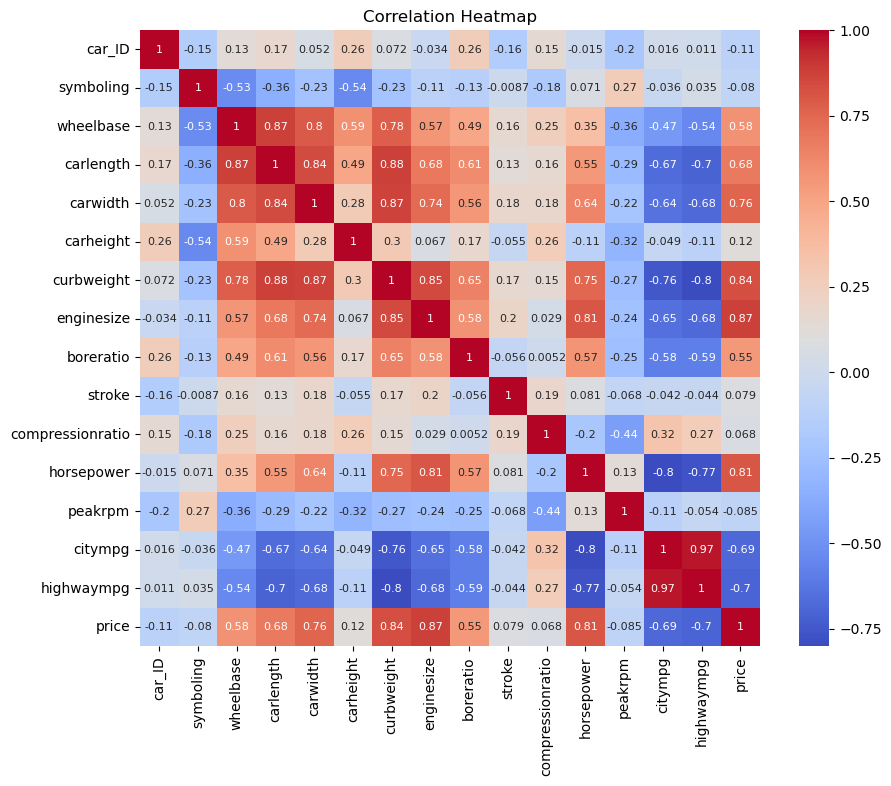

In [22]:
# Correlation Analysis
correlation_matrix = numeric_vars.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 8})
plt.title('Correlation Heatmap')
plt.show()

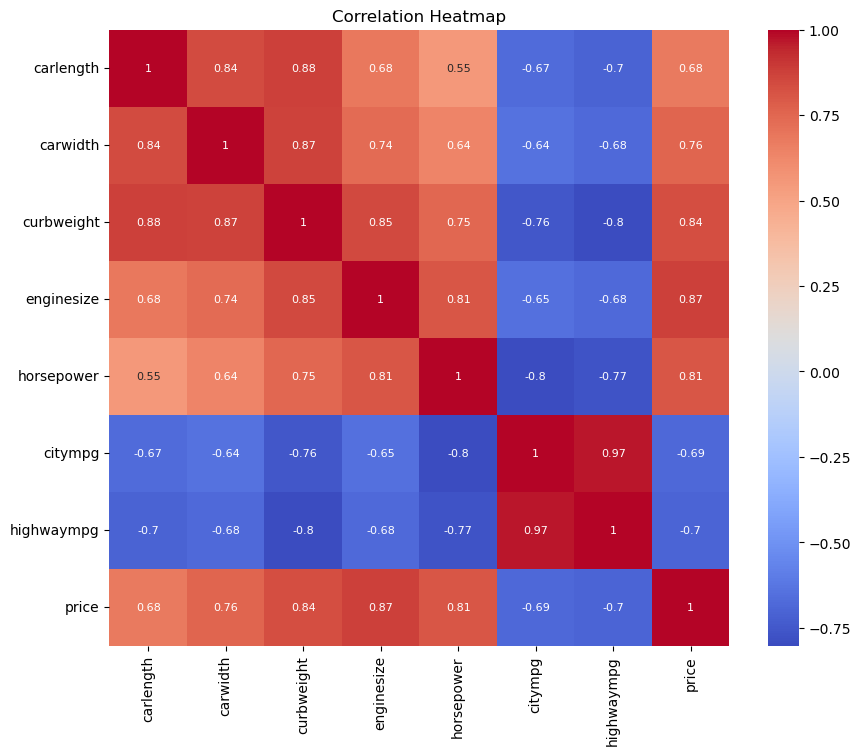

In [23]:
# Correlation Analysis
numeric_vars2 = numeric_vars.drop(columns=['car_ID', 'wheelbase', 'symboling','carheight','boreratio', 'stroke','compressionratio','peakrpm'])

correlation_matrix = numeric_vars2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 8})
plt.title('Correlation Heatmap')
plt.show()

R-squared (R²): 0.815
Mean Squared Error (MSE): 14639883.846


    Variables  Coefficients
0   Intercept -46141.316204
1   carlength    -25.874350
2    carwidth    676.112941
3  curbweight      2.252055
4  enginesize     80.986584
5  horsepower     43.788773
6     citympg   -123.618244
7  highwaympg     59.486882




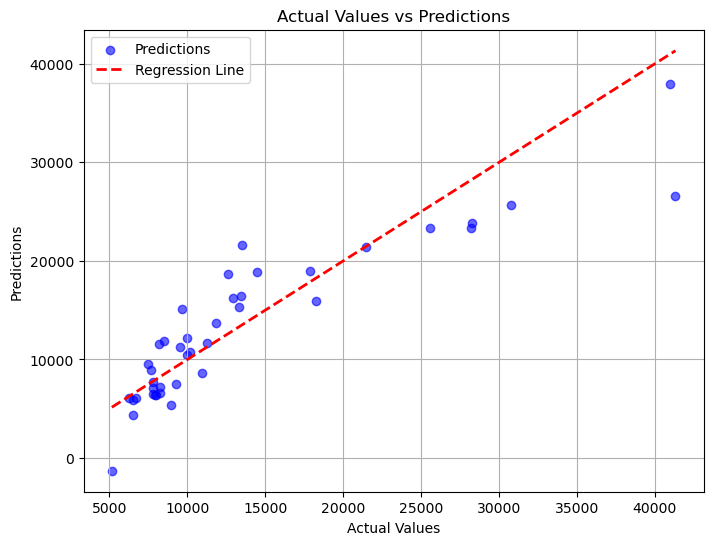

In [24]:
# Separate the independent variables (X) and the dependent variable (y)
X = cardata[['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower','citympg', 'highwaympg']]  # Independent variables
y = cardata['price']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print("\n")

# Create a DataFrame for the coefficients
variables =  ['Intercept'] + X.columns.tolist()
coefficients = [model.intercept_] + list(model.coef_) 

# Create a DataFrame
coef_table = pd.DataFrame({'Variables': variables, 'Coefficients': coefficients})

# Display the table
print(coef_table)
print("\n")

# Visualization (optional): Predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Actual Values vs Predictions")
plt.legend()
plt.grid()
plt.show()


Unique values in categorical variables:
CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8

In [25]:
# Lista de variables categóricas y numéricas
categorical_vars1 = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                    'drivewheel', 'enginelocation', 'enginetype', 
                    'cylindernumber', 'fuelsystem']

numerical_vars1 = ['carlength', 'carwidth', 'curbweight', 'enginesize', 
                  'horsepower', 'citympg', 'highwaympg', 'price']

# Realizar One-Hot Encoding en las variables categóricas
categorical_encoded = pd.get_dummies(cardata[categorical_vars1], drop_first=True)

""""
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
""""
# Combinar las variables codificadas con las variables numéricas
carRegreRecode = pd.concat([cardata[numerical_vars1], categorical_encoded], axis=1)

# Ver el DataFrame resultante
print(carRegreRecode.head())
print("\n")
print(carRegreRecode.columns)


SyntaxError: unterminated string literal (detected at line 17) (3135212008.py, line 17)

In [ ]:
# Correlation Analysis
correlation_matrix = carRegreRecode.corr()

# Filtrar las correlaciones de 'price' que están entre -0.5 y 0.5
correlation_with_price = correlation_matrix['price']

# Filtrar solo las correlaciones con 'price' mayores que 0.5 o menores que -0.5
filtered_correlations = correlation_with_price[(correlation_with_price > 0.5) | (correlation_with_price < -0.5)]

# Mostrar las correlaciones filtradas
print("Filtered Correlations with 'price':")
print(filtered_correlations)

# Crear un nuevo DataFrame con las columnas que tienen correlaciones significativas con 'price'
filtered_columns = filtered_correlations.index

# Asegurarse de que 'price' esté al final de las columnas
if 'price' in filtered_columns:
    filtered_columns = [col for col in filtered_columns if col != 'price'] + ['price']

# Crear la matriz de correlación filtrada
filtered_correlation_matrix = correlation_matrix[filtered_columns][filtered_columns]

# Mostrar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 8})
plt.title('Filtered Correlation Heatmap (>|0.5|) with price')
plt.show()


In [ ]:
# Create Dataframe
numeric_vars3 = carRegreRecode[['carlength', 'carwidth', 'curbweight','enginesize','horsepower', 'citympg','highwaympg',
                                        'drivewheel_fwd', 'drivewheel_rwd', 'cylindernumber_four', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'price']]

# Correlation Analysis
correlation_matrix = numeric_vars3.corr()

# Filtrar las correlaciones de 'price' que están entre -0.5 y 0.5
correlation_with_price = correlation_matrix['price']

# Filtrar solo las correlaciones con 'price' mayores que 0.5 o menores que -0.5
filtered_correlations = correlation_with_price[(correlation_with_price > 0.5) | (correlation_with_price < -0.5)]

# Mostrar las correlaciones filtradas
print("Filtered Correlations with 'price':")
print(filtered_correlations)

# Crear un nuevo DataFrame con las columnas que tienen correlaciones significativas con 'price'
filtered_columns = filtered_correlations.index

# Asegurarse de que 'price' esté al final de las columnas
if 'price' in filtered_columns:
    filtered_columns = [col for col in filtered_columns if col != 'price'] + ['price']

# Crear la matriz de correlación filtrada
filtered_correlation_matrix = correlation_matrix[filtered_columns][filtered_columns]

# Mostrar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 8})
plt.title('Filtered Correlation Heatmap (>|0.5|) with price')
plt.show()

In [ ]:
# Separate the independent variables (X) and the dependent variable (y)
X = carRegreRecode[['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower','highwaympg', 'drivewheel_fwd',
                    'cylindernumber_four','fuelsystem_mpfi' ]]  # Independent variables
y = cardata['price']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print("\n")

# Create a DataFrame for the coefficients
variables =  ['Intercept'] + X.columns.tolist()
coefficients = [model.intercept_] + list(model.coef_) 

# Create a DataFrame
coef_table = pd.DataFrame({'Variables': variables, 'Coefficients': coefficients})

# Display the table
print(coef_table)
print("\n")

# Visualization (optional): Predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Actual Values vs Predictions")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge R-squared (R²): {r2_ridge:.3f}")
print(f"Ridge Mean Squared Error (MSE): {mse_ridge:.3f}")


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso R-squared (R²): {r2_lasso:.3f}")
print(f"Lasso Mean Squared Error (MSE): {mse_lasso:.3f}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R-squared (R²): {r2_rf:.3f}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf:.3f}")


In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR R-squared (R²): {r2_svr:.3f}")
print(f"SVR Mean Squared Error (MSE): {mse_svr:.3f}")


In [ ]:
# Datos de un nuevo automóvil
new_data = {
    'carlength': 144.6,  # en pulgadas
    'carwidth': 6.9,    # en pulgadas
    'curbweight': 1713,  # en libras
    'enginesize': 92,   # en caballos de fuerza
    'horsepower': 58,   # en caballos de fuerza
    'highwaympg': 54,    # millas por galón en carretera
    'drivewheel_fwd': 1,  # 1 si es tracción delantera, 0 si no
    'cylindernumber_four': 1,  # 1 si tiene 4 cilindros, 0 si no
    'fuelsystem_mpfi': 1   # 1 si tiene inyección de combustible multipunto, 0 si no
}

# Convertir los datos a un DataFrame
import pandas as pd
new_df = pd.DataFrame([new_data])

# Usar el modelo entrenado para hacer una predicción del precio
predicted_price = rf_model.predict(new_df)

# Mostrar el precio predicho
print(f"El precio predicho para el automóvil es: ${predicted_price[0]:,.0f}")
print(f"El precio observed  para el automóvil es: $6,479")

# Decision Tree

#There are 32 Toyota Cars and all are the label "toyota"

In [ ]:
# Filter rows where 'CarName' contains 'Toy' or 'TOYO' (case insensitive)
filtered_cars = cardata[cardata['CarName'].str.contains('Toy|TOYO', case=False, na=False)]

# Display the filtered rows
print(filtered_cars)

# Count the number of filtered rows
count_filtered = filtered_cars.shape[0]
print(f"Number of filtered rows: {count_filtered}")


In [ ]:
# Create a new 'Make' column based on the condition in 'CarName'
cardata['Make'] = cardata['CarName'].apply(lambda x: 'Toyota' if pd.Series(x).str.contains('toyota|toyouta', case=False, na=False).any() else 'Other')

# Display the updated DataFrame to verify the result
print(cardata[['CarName', 'Make']].head(-20))  # Display the first 20 rows to verify the result

In [ ]:
# Count unique values in the 'Make' column
make_counts = cardata['Make'].value_counts()

# Display the result
print(make_counts)

In [ ]:
#Check the data
cardata.shape

In [ ]:
# Crear una nueva columna 'Country' basada en la columna 'CarName'
cardata['Country'] = cardata['CarName'].apply(lambda x: 'Japan' 
                                              if any(brand in x.lower() for brand in ['toyota', 'toyouta', 'mazda', 'maxda', 'honda', 'isuzu', 'nissan', 'subaru']) 
                                              else 'Other')

# Mostrar el DataFrame actualizado para verificar el resultado
print(cardata[['CarName', 'Make', 'Country']].head(100))  # Mostrar las primeras 20 filas para verificar el resultado

In [ ]:
# Group by 'Country' and 'Make' to get the frequency counts
country_make_freq = cardata.groupby(['Country', 'Make']).size().reset_index(name='Frequency')

# Display the result
print(country_make_freq)

In [ ]:
#Check the data
cardata.shape

In [ ]:

# Filter the DataFrame to show only rows where 'Make' is 'Toyota' and display the 'CarSize' column
toyota_subset = cardata[cardata['Make'] == 'Toyota'][['Make', 'enginesize', 'fueltype', 'carbody', 'price']]

# Display the result
print(toyota_subset)

# Count unique values in the 'Make' column
toyota_counts = toyota_subset['Make'].value_counts()

# Display the result
print(toyota_counts)

In [ ]:
# Calculate the mean, median, and mode for the 'EngineSize' column
mean_enginesize = cardata['enginesize'].mean()
median_enginesize = cardata['enginesize'].median()
mode_enginesize = cardata['enginesize'].mode()[0]  # mode() returns a series, so we take the first value

# Display the results
print(f"Mean of EngineSize: {mean_enginesize}")
print(f"Median of EngineSize: {median_enginesize}")
print(f"Mode of EngineSize: {mode_enginesize}")


In [ ]:
# Create a new 'Engine123' column based on the 'enginesize' column
cardata['Engine123'] = cardata['enginesize'].apply(lambda x: 'Large' if x >=123 else 'Small')

# Display the updated DataFrame to verify the result
print(cardata[['Make', 'Engine123']].head(-50))  # rows to verify the result

In [ ]:
# Create a new 'Sedan' column based on the 'enginesize' column
cardata['Sedan'] = cardata['carbody'].apply(lambda x: 'Sedan' if x == 'sedan'  else 'Other')

# Display the updated DataFrame to verify the result
print(cardata[['Make', 'Sedan']].head(-48))   # rows to verify the result



In [ ]:
# Calculate the mean, median, and mode for the 'price' column
mean_price = cardata['price'].mean()
median_price = cardata['price'].median()
mode_price = cardata['price'].mode()[0]  # mode() returns a series, so we take the first value

# Display the results
print(f"Mean of Price: {mean_price}")
print(f"Median of Price: {median_price}")
print(f"Mode of Price: {mode_price}")


In [ ]:
# Create a new 'pricerange' column based on the 'price' column
cardata['pricerange'] = cardata['price'].apply(lambda x: 'Low' if x <= 13500  else 'High')

# Display the updated DataFrame to verify the result
print(cardata[['Make', 'pricerange']].head(-48))   # rows to verify the result


#DataFrame for the Decision Tree

In [ ]:
# Sort columns by data type
sorted_dtypes = cardata.dtypes.sort_values()

# Display the sorted data types
print(sorted_dtypes)


In [ ]:
# Subset for the analysis 
toyota_recode = cardata[['car_ID','Country', 'Engine123', 'Sedan','pricerange','Make']]

# Display the result
print(toyota_recode)

# Count unique values in the 'Make' column
recode_counts = toyota_recode ['Make'].value_counts()
recode_counts1 = toyota_recode ['Country'].value_counts()

# Display the result
print(recode_counts)
print(recode_counts1)

In [ ]:
# Info and Describe 
toyota_recode.info()
toyota_recode.describe()

In [ ]:
# Create encoder for 'Make', 'PriceRange', 'Sedan', 'Engine123' y 'Country'
cardata['toyota_encoder'] = cardata['Make'].apply(lambda x: 1 if 'toyota' in x.lower() else 0)
cardata['PriceRange_encoder'] = cardata['pricerange'].apply(lambda x: 1 if x.lower() == 'low' else 0)
cardata['Sedan_encoder'] = cardata['Sedan'].apply(lambda x: 1 if x.lower() == 'sedan' else 0)
cardata['Engine123_encoder'] = cardata['Engine123'].apply(lambda x: 1 if x.lower() == 'small' else 0)
cardata['Country_encoder'] = cardata['Country'].apply(lambda x: 1 if x.lower() == 'japan' else 0)

# Display the result
print(cardata.iloc[:20, -10:])

In [ ]:
#Check the data
cardata.shape

In [ ]:
# Subset for the analysis 
toyota_encoder = cardata[['Country_encoder', 'Engine123_encoder', 'Sedan_encoder','PriceRange_encoder','toyota_encoder']]

# Display the result
print(toyota_encoder)

# Count unique values in the 'Make' column
make_counts = toyota_encoder['toyota_encoder'].value_counts()
country_counts = toyota_encoder ['Country_encoder'].value_counts()

# Display the result
print(make_counts )
print(country_counts)

In [ ]:
# Create binary target: 1 if Make is Toyota, 0 otherwise
toyota_encoder.loc[:, 'Target'] = toyota_encoder['toyota_encoder'].apply(lambda x: 1 if x == 1 else 0)


# Function to calculate Gini Impurity for a given feature
def gini_impurity(series):
    # Get the value counts of the target variable (0 and 1) for each unique value in the feature
    value_counts = series.value_counts(normalize=True)
    
    # Gini impurity calculation
    gini = 1 - sum(value_counts**2)
    return gini

# List of features to analyze
features = ['Country_encoder', 'Engine123_encoder', 'Sedan_encoder','PriceRange_encoder']

# Calculate Gini Impurity for each feature
gini_results = {feature: gini_impurity(toyota_encoder[feature]) for feature in features}

# Convert the results to a DataFrame for better formatting and sorting
gini_df = pd.DataFrame(list(gini_results.items()), columns=['Feature', 'Gini Impurity'])

# Sort by Gini Impurity in ascending order and round to 2 decimal places
gini_df = gini_df.sort_values(by='Gini Impurity').round(2)

# Display the sorted table
print(gini_df)

In [ ]:
toyota_encoder.shape

In [ ]:
# Group by 'Country' and 'Make' to get the frequency counts
country_make_freq = toyota_encoder.groupby(['Country_encoder', 'toyota_encoder']).size().reset_index(name='Frequency')

# Display the result
print(country_make_freq)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Features: ['Country_encoder', 'Engine123_encoder', 'Sedan_encoder', 'PriceRange_encoder']
# Target: 'toyota_encoder' (1 para Toyota, 0 para otros)

# select Features and target
X = toyota_encoder[['Country_encoder', 'Engine123_encoder', 'Sedan_encoder', 'PriceRange_encoder']]  # Features
y = toyota_encoder['toyota_encoder']  # Target (1 Toyota, 0 other)

# Crear el clasificador de árbol de decisión
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)  # max_depth para evitar sobreajuste
dtree.fit(X, y)

# Guardar las predicciones en una nueva columna del DataFrame
toyota_encoder['predicted_toyota'] = dtree.predict(X)

# Evaluar la precisión del modelo
accuracy = dtree.score(X, y)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree 1. Entropy")
plt.show()

# Imprimir las predicciones y la precisión
print("Predictions (1=Toyota, 0=Other):", prediction)
print(f"Accuracy: {accuracy:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(toyota_encoder, test_size=0.2, random_state=42)

# Definir las variables dependientes e independientes
feature_cols = ['Country_encoder', 'Engine123_encoder', 'Sedan_encoder', 'PriceRange_encoder']
target_col = 'toyota_encoder'

# Preparar los datos de entrenamiento y prueba
X_train = train_data[feature_cols]
y_train = train_data[target_col]
X_test = test_data[feature_cols]
y_test = test_data[target_col]

# Entrenar el modelo de Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Obtener la importancia de las variables
feature_importance = dtree.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_cols)[sorted_idx])
plt.xlabel('Importancia de las Variables')
plt.title('Importancia de Variables en el Decision Tree')
plt.grid(False)
plt.show()

# Predicciones
y_pred = dtree.predict(X_test)

# Comparación Visual: Actual vs. Predicción
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicciones')
plt.plot([0, 1], [0, 1], '--', color='red', label='Línea Perfecta')
plt.xlabel('Valores Actuales')
plt.ylabel('Predicciones')
plt.title('Comparación Actual vs. Predicción')
plt.legend()
plt.grid(False)
plt.show()

# Diferencia Residual
residuals = y_test - y_pred
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, residuals, alpha=0.7, label='Residuos')
plt.axhline(0, color='red', linestyle='--', label='Residuo = 0')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.legend()
plt.grid(False)
plt.show()



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Features: ['Country_encoder', 'Engine123_encoder', 'Sedan_encoder', 'PriceRange_encoder']
# Target: 'toyota_encoder' (1 para Toyota, 0 para otros)

# select Features and target
X = toyota_encoder[['Country_encoder', 'Engine123_encoder', 'Sedan_encoder', 'PriceRange_encoder']]  #  Features
y = toyota_encoder['toyota_encoder']  # Target (1  Toyota, 0  other)

# Crear el clasificador de árbol de decisión
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)  # max_depth para evitar sobreajuste
dtree.fit(X, y)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree 1.  Entropy ")
plt.show()

# Evaluar la precisión del modelo
accuracy = dtree.score(X, y)

# Imprimir la precisión
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
toyota_encoder.shape

In [ ]:
# Group by Comparison 
ActualVsPrediction = toyota_encoder.groupby(['toyota_encoder','predicted_toyota']).size().reset_index(name='Frequency')
# Calcular la frecuencia relativa
ActualVsPrediction['Relative_Frequency'] = ActualVsPrediction['Frequency'] / ActualVsPrediction['Frequency'].sum()

# Redondear la frecuencia relativa a dos decimales
ActualVsPrediction['Relative_Frequency'] = ActualVsPrediction['Relative_Frequency'].round(2)

# Display the result
print(ActualVsPrediction)

In [ ]:
# Group by 'compracion ' and 'toyota_encoder and predictions' to get the frequency counts
compracion= toyota_encoder.groupby(['Country_encoder', 'toyota_encoder']).size().reset_index(name='Frequency')

# Display the result
print(country_make_freq)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador de Random Forest
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# Entrenar el modelo
rf.fit(X, y)

# Evaluar el modelo
print(f"Accuracy: {rf.score(X, y)}")

# Graficar uno de los árboles del Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree from Random Forest")
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear el clasificador de Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
gb.fit(X, y)

# Evaluar el modelo
print(f"Accuracy: {gb.score(X, y)}")


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convertir los datos a DMatrix, que es el formato optimizado de XGBoost
dtrain = xgb.DMatrix(X, label=y)

# Parámetros del modelo
params = {
    'objective': 'binary:logistic',  # Problema de clasificación binaria
    'eval_metric': 'logloss',        # Medición de pérdida
    'max_depth': 3,                  # Profundidad máxima de los árboles
    'eta': 0.1                       # Tasa de aprendizaje
}

# Entrenar el modelo
bst = xgb.train(params, dtrain, num_boost_round=100)

# Hacer predicciones
preds = bst.predict(dtrain)
preds = [1 if p > 0.5 else 0 for p in preds]

# Evaluar el modelo
accuracy = accuracy_score(y, preds)
print(f"Accuracy: {accuracy}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(toyota_encoder, test_size=0.2, random_state=42)

# Define dependent and independent variables
feature_cols = ['Country_encoder', 'Engine123_encoder', 'Sedan_encoder', 'PriceRange_encoder']
target_col = 'toyota_encoder'

# Prepare training and testing data
X_train = train_data[feature_cols]
y_train = train_data[target_col]
X_test = test_data[feature_cols]
y_test = test_data[target_col]

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance Plot
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_cols)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.grid(False)
plt.show()

# Actual vs. Predicted Plot
y_pred = rf_model.predict(X_test)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(False)
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(False)
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


## Resumen:
*Random Forests*: Promedia los resultados de muchos árboles, mejora la precisión y reduce el sobreajuste.
*Gradient Boosting*: Construye árboles de manera secuencial, corrigiendo los errores de los árboles anteriores.
*XGBoost*: Variante más eficiente y optimizada de Gradient Boosting.
*LightGBM*: Similar a XGBoost, pero más eficiente en términos de memoria y velocidad.
*CatBoost*: Excelente para manejar características categóricas sin necesidad de codificación.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador de árbol de decisión
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
dtree.fit(X_train, y_train)


In [ ]:
# Evaluar la precisión en el conjunto de prueba
accuracy = dtree.score(X_test, y_test)

# Imprimir la precisión
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")


In [ ]:
# Probar diferentes valores para max_depth y min_samples_split
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)
dtree.fit(X_train, y_train)


In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
scores = cross_val_score(dtree, X, y, cv=5)  # cv=5 significa 5 particiones

# Imprimir la precisión promedio de la validación cruzada
print(f"Promedio de precisión en validación cruzada: {scores.mean():.4f}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Hacer predicciones en el conjunto de prueba
y_pred = dtree.predict(X_test)

# Generar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matriz de confusión:\n{conf_matrix}")


## Confusion Matriz
TN, FP
FN, TP

34  TN  NO TOYOTA
0   FP  NO TOYOPA, Actually  TOYOTA
6   FN  Actually Toyota but classify as not toyota 
1   TP   Actually toyota and clasify as totoya

Presicion.  Lo que debe de hacer 
34 TN  + 1 TP  entre total 41  = 85%  en diagonal

Recall 



Resumen de lo que hicimos:
Dividir los datos en conjuntos de entrenamiento y prueba.
Entrenar el modelo con el conjunto de entrenamiento.
Evaluar la precisión en el conjunto de prueba.
Mejorar el modelo utilizando técnicas como el ajuste de hiperparámetros, validación cruzada, preprocesamiento, y exploración de otros algoritmos como Random Forest.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Crear una nueva columna para identificar si el auto es Toyota
cardata['is_toyota'] = cardata['CarName'].apply(lambda x: 1 if 'toyota' in x.lower() else 0)

# Seleccionar las características (features) y el objetivo (target)
features = ['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'carlength', 'carwidth', 'wheelbase', 
            'fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype']

X = cardata[features]

# Verificar las columnas que contiene 'X'
print(X.columns)

# Codificar las variables categóricas usando One-Hot Encoding
X = pd.get_dummies(X, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype'], drop_first=True)

# Definir la variable objetivo (target)
y = cardata['is_toyota']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características para mejorar el rendimiento del modelo (opcional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el árbol de decisión
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Realizar predicciones con el árbol de decisión
dtree_prediction = dtree.predict(X_test)

# Evaluar el rendimiento del modelo
dtree_accuracy = dtree.score(X_test, y_test)

# Crear y entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Realizar predicciones con Random Forest
rf_prediction = rf.predict(X_test)

# Evaluar el rendimiento del Random Forest
rf_accuracy = rf.score(X_test, y_test)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree - Entropy")
plt.show()

# Imprimir las precisiones
print(f"Decision Tree Accuracy: {dtree_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


In [ ]:
print(cardata.columns)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear una nueva columna para identificar si el auto es Toyota
cardata['is_toyota'] = cardata['CarName'].apply(lambda x: 1 if 'toyota' in x.lower() else 0)

# Seleccionar las características (features) y el objetivo (target)
features = ['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'carlength', 'carwidth', 'wheelbase', 
            'fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype']

X = cardata[features]

# Codificar las variables categóricas usando One-Hot Encoding
X = pd.get_dummies(X, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype'], drop_first=True)

# Definir la variable objetivo (target)
y = cardata['is_toyota']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el árbol de decisión
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Hacer predicciones y calcular precisión y matriz de confusión para el árbol de decisión
dtree_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
dtree_conf_matrix = confusion_matrix(y_test, dtree_pred)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree - Entropy")
plt.show()

# Imprimir la precisión y la matriz de confusión para el árbol de decisión
print(f"Decision Tree Accuracy: {dtree_accuracy:.4f}")
print("Decision Tree Confusion Matrix:")
print(dtree_conf_matrix)

# Crear y entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Hacer predicciones y calcular precisión y matriz de confusión para el Random Forest
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Graficar un árbol aleatorio del Random Forest (elegimos el primer árbol)
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Random Forest - First Decision Tree")
plt.show()

# Imprimir la precisión y la matriz de confusión para el Random Forest
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)



In [ ]:
# Ver la profundidad de cada árbol en el Random Forest
for idx, tree in enumerate(rf.estimators_):
    print(f"Tree {idx+1} Depth: {tree.get_depth()}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear una nueva columna para identificar si el auto es Toyota
cardata['is_toyota'] = cardata['CarName'].apply(lambda x: 1 if 'toyota' in x.lower() else 0)

# Seleccionar las características (features) y el objetivo (target)
features = ['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'carlength', 'carwidth', 'wheelbase', 
            'fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype']

X = cardata[features]

# Codificar las variables categóricas usando One-Hot Encoding
X = pd.get_dummies(X, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype'], drop_first=True)

# Definir la variable objetivo (target)
y = cardata['is_toyota']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el árbol de decisión
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Hacer predicciones y calcular precisión y matriz de confusión para el árbol de decisión
dtree_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
dtree_conf_matrix = confusion_matrix(y_test, dtree_pred)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree - Entropy")
plt.show()

# Imprimir la precisión y la matriz de confusión para el árbol de decisión
print(f"Decision Tree Accuracy: {dtree_accuracy:.4f}")
print("Decision Tree Confusion Matrix:")
print(dtree_conf_matrix)

# Crear y entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Hacer predicciones y calcular precisión y matriz de confusión para el Random Forest
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Graficar un árbol aleatorio del Random Forest (elegimos el primer árbol)
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Random Forest - First Decision Tree")
plt.show()

# Imprimir la precisión y la matriz de confusión para el Random Forest
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear una nueva columna para identificar si el auto es Toyota
cardata['is_toyota'] = cardata['CarName'].apply(lambda x: 1 if 'toyota' in x.lower() else 0)

# Seleccionar las características (features) y el objetivo (target)
features = ['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'carlength', 'carwidth', 'wheelbase', 
            'fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype']

X = cardata[features]

# Codificar las variables categóricas usando One-Hot Encoding
X = pd.get_dummies(X, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype'], drop_first=True)

# Definir la variable objetivo (target)
y = cardata['is_toyota']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el árbol de decisión
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Hacer predicciones y calcular precisión y matriz de confusión para el árbol de decisión
dtree_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
dtree_conf_matrix = confusion_matrix(y_test, dtree_pred)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree - Entropy")
plt.show()

# Imprimir la precisión y la matriz de confusión para el árbol de decisión
print(f"Decision Tree Accuracy: {dtree_accuracy:.4f}")
print("Decision Tree Confusion Matrix:")
print(dtree_conf_matrix)



# Crear y entrenar el modelo de Random Forest
#rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
#rf.fit(X_train, y_train)

#Limitar el número mínimo de muestras en una hoja (min_samples_leaf):
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=4, random_state=42)
rf.fit(X_train, y_train)



# Hacer predicciones y calcular precisión y matriz de confusión para el Random Forest
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Graficar un árbol aleatorio del Random Forest (elegimos el primer árbol)
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Random Forest - First Decision Tree")
plt.show()

# Imprimir la precisión y la matriz de confusión para el Random Forest
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear una nueva columna para identificar si el auto es Toyota
cardata['is_toyota'] = cardata['CarName'].apply(lambda x: 1 if 'toyota' in x.lower() else 0)

# Seleccionar las características (features) y el objetivo (target)
features = ['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'carlength', 'carwidth', 'wheelbase', 
            'fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype']

X = cardata[features]

# Codificar las variables categóricas usando One-Hot Encoding
X = pd.get_dummies(X, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'enginetype'], drop_first=True)

# Definir la variable objetivo (target)
y = cardata['is_toyota']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el árbol de decisión
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Hacer predicciones y calcular precisión y matriz de confusión para el árbol de decisión
dtree_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
dtree_conf_matrix = confusion_matrix(y_test, dtree_pred)

# Graficar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree - Entropy")
plt.show()

# Imprimir la precisión y la matriz de confusión para el árbol de decisión
print(f"Decision Tree Accuracy: {dtree_accuracy:.4f}")
print("Decision Tree Confusion Matrix:")
print(dtree_conf_matrix)



# Crear y entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

#Limitar el número mínimo de muestras en una hoja (min_samples_leaf):
#rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=4, random_state=42)
#rf.fit(X_train, y_train)



# Hacer predicciones y calcular precisión y matriz de confusión para el Random Forest
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Graficar un árbol aleatorio del Random Forest (elegimos el primer árbol)
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['No Toyota', 'Toyota'], filled=True, rounded=True, fontsize=12)
plt.title("Random Forest - First Decision Tree")
plt.show()

# Imprimir la precisión y la matriz de confusión para el Random Forest
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)